In [206]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [188]:
data =pd.read_csv('data/201912-capitalbikeshare-tripdata.csv')

In [189]:
data.head()

,Duration,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type
0,163,2019-12-01 00:00:25,2019-12-01 00:03:08,31609,Maine Ave & 7th St SW,31294,7th & E St SW,W21186,Member
1,309,2019-12-01 00:02:41,2019-12-01 00:07:50,31104,Adams Mill & Columbia Rd NW,31602,Park Rd & Holmead Pl NW,W23636,Member
2,1527,2019-12-01 00:05:34,2019-12-01 00:31:02,31106,Calvert & Biltmore St NW,31301,Ward Circle / American University,W00501,Member
3,1509,2019-12-01 00:05:43,2019-12-01 00:30:53,31106,Calvert & Biltmore St NW,31301,Ward Circle / American University,W22863,Member
4,81,2019-12-01 00:06:04,2019-12-01 00:07:26,31265,5th St & Massachusetts Ave NW,31600,5th & K St NW,W00236,Member


In [190]:
data.tail()

,Duration,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type
161873,130,2019-12-31 23:57:36,2019-12-31 23:59:46,31011,Crystal Dr & 23rd St S,31009,Crystal Dr & 27th St S,W21285,Member
161874,664,2019-12-31 23:57:47,2020-01-01 00:08:51,31125,15th & W St NW,31281,8th & O St NW,W24197,Member
161875,389,2019-12-31 23:59:37,2020-01-01 00:06:06,31047,Braddock Rd Metro,31085,Mount Vernon Ave & E Nelson Ave,W21281,Member
161876,962,2019-12-31 23:59:38,2020-01-01 00:15:40,31236,37th & O St NW / Georgetown University,31214,17th & Corcoran St NW,W00534,Member
161877,183,2019-12-31 23:59:55,2020-01-01 00:02:58,31227,13th St & New York Ave NW,31254,15th & K St NW,W22782,Member


In [191]:
data.shape

(161878, 9)

In [192]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161878 entries, 0 to 161877
Data columns (total 9 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   Duration              161878 non-null  int64 
 1   Start date            161878 non-null  object
 2   End date              161878 non-null  object
 3   Start station number  161878 non-null  int64 
 4   Start station         161878 non-null  object
 5   End station number    161878 non-null  int64 
 6   End station           161878 non-null  object
 7   Bike number           161878 non-null  object
 8   Member type           161878 non-null  object
dtypes: int64(3), object(6)
memory usage: 11.1+ MB


In [193]:
data.columns

Index(['Duration', 'Start date', 'End date', 'Start station number',
       'Start station', 'End station number', 'End station', 'Bike number',
       'Member type'],
      dtype='object')

In [194]:
data['Start station number'].nunique()

571

In [195]:
data['End station number'].nunique()

572

In [196]:
count=pd.DataFrame(data['Start station number'].value_counts().nlargest(10))

In [197]:
count=count.reset_index()

In [198]:
count.columns

Index(['index', 'Start station number'], dtype='object')

In [201]:
count.columns=['Start station number','Total_trip']

In [202]:
count.head(10)

,Start station number,Total_trip
0,31623,3266
1,31124,1993
2,31229,1961
3,31201,1847
4,31603,1515
5,31101,1488
6,31613,1467
7,31214,1355
8,31241,1345
9,31200,1288


In [203]:
count_type=pd.DataFrame(data.groupby(['Start station number','Member type'])['Start station number'].count().rename('count_by_membership'))

In [204]:
count_type=count_type.reset_index()

In [205]:
count_type

,Start station number,Member type,count_by_membership
0,0,Casual,20
1,0,Member,478
2,31000,Casual,6
3,31000,Member,38
4,31001,Casual,4
...,...,...,...
1043,32607,Casual,3
1044,32607,Member,6
1045,32608,Casual,1
1046,32608,Member,15


In [207]:
barWidth = 0.25

In [208]:
cleaned_data=count

In [209]:
casual=count_type[count_type['Member type']=='Casual']

In [210]:
member=count_type[count_type['Member type']=='Member']

In [212]:
cleaned_data

,Start station number,Total_trip
0,31623,3266
1,31124,1993
2,31229,1961
3,31201,1847
4,31603,1515
5,31101,1488
6,31613,1467
7,31214,1355
8,31241,1345
9,31200,1288


In [213]:
casual.head()

,Start station number,Member type,count_by_membership
0,0,Casual,20
2,31000,Casual,6
4,31001,Casual,4
6,31002,Casual,15
8,31003,Casual,12


In [214]:
member

,Start station number,Member type,count_by_membership
1,0,Member,478
3,31000,Member,38
5,31001,Member,45
7,31002,Member,132
9,31003,Member,136
...,...,...,...
1040,32605,Member,20
1042,32606,Member,44
1044,32607,Member,6
1046,32608,Member,15


In [215]:
d=count.merge(casual, on='Start station number', how='inner', indicator=True)

In [216]:
d.columns

Index(['Start station number', 'Total_trip', 'Member type',
       'count_by_membership', '_merge'],
      dtype='object')

In [217]:
d=d[['Start station number','Total_trip','count_by_membership']]

In [219]:
d=d.merge(member, on='Start station number', how='inner', indicator=True)

In [221]:
d.columns

Index(['Start station number', 'Total_trip', 'count_by_membership_x',
       'Member type', 'count_by_membership_y', '_merge'],
      dtype='object')

In [223]:
d=d[['Start station number', 'Total_trip', 'count_by_membership_x','count_by_membership_y']]

In [224]:
d

,Start station number,Total_trip,count_by_membership_x,count_by_membership_y
0,31623,3266,68,3198
1,31124,1993,35,1958
2,31229,1961,32,1929
3,31201,1847,40,1807
4,31603,1515,30,1485
5,31101,1488,30,1458
6,31613,1467,25,1442
7,31214,1355,25,1330
8,31241,1345,61,1284
9,31200,1288,60,1228


In [225]:
pos = list(range(len(d))) 
width = 0.25 

<BarContainer object of 10 artists>

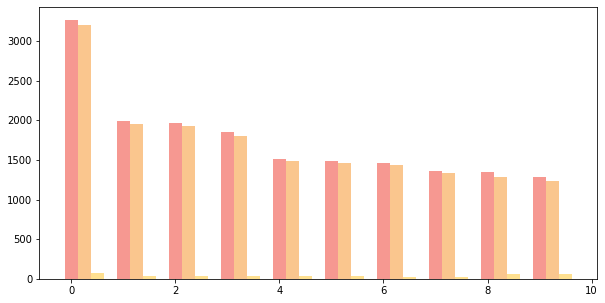

In [234]:
fig, ax = plt.subplots(figsize=(10,5))
plt.bar(pos, 
        d['Total_trip'], 
        width, 
        alpha=0.5, 
        color='#EE3224', 
        label=d['Start station number'][0]) 

plt.bar([p + width*2 for p in pos], 
        d['count_by_membership_x'], 
        width, 
        alpha=0.5, 
        color='#FFC222', 
        label=d['Start station number'][1]) 

plt.bar([p + width for p in pos], 
        d['count_by_membership_y'],
        width, 
        alpha=0.5, 
        color='#F78F1E', 
        label=d['Start station number'][2])